# Predictive Maintenance Classification: A study in class imbalance

Need to fix:
- ReadMe: Final test score

## Goal:

- Discover the indicators for equipment failure.
- Use indicators to develop a machine learning model to classify equipment as likely or unlikely to fail.

## Package Imports


In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import wrangle as w
import explore as e
import modeling as m

In [2]:
#setting global variables
random_seed=1969
target_col = 'Target'
alpha = 0.05

## Data Dictionary:


| Feature |	Definition |
|:--------|:-----------|
|UID| Unique identifier ranging from 1 to 10000|
|ProductID| A variant-specific serial number that begins with the Type.|
|Type| A quality rating indicated by a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number|
|Air temperature [K]| Generated using a random walk process later normalized to a standard deviation of 2 K around 300 K|
|Process temperature [K]| Generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.|
|Rotational speed [rpm]| Calculated from powepower of 2860 W, overlaid with a normally distributed noise|
|Torque [Nm]| Torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.|
|Tool wear [min]|  The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.|
|Target|  Label that indicates if the machine has failed.|
|Failure Type| Includes: No Failure, Heat Dissipation Failure, Power Failure, Overstrain Failure, Tool Wear Failure, Random Failures.|


## Acquire

- Data acquired from Kaggle for Machine Predictive Maintenance Classification.
    - https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification?select=predictive_maintenance.csv
- Origionally from:
    - https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset
- The query resulted in 10 columns and 10,000 rows.
- Each row represents a record about a piece of equipment.
- Each column represents a feature associated with that equipment.

In [3]:
#Gets data
df = w.wrangle_data()

## Prepare

### Prepare Actions:
1. No null values.
2. Changed column for temperature difference between the process and air.
3. Created dummy columns for categorical fields.
4. Dropped unused columns.
5. Split data into Train, Validate and Test sets (approx. 60/20/20), stratifying on 'Target'.

In [4]:
#Gets data set to explore on
train, val, test = w.train_validate(df, stratify_col = 'Target')

## Exploring the data

Questions: What is the relationship between each feature and the target feature (Failure)?

H0: There is no difference in the distribution means.

HA: There is a difference in the distribution means.

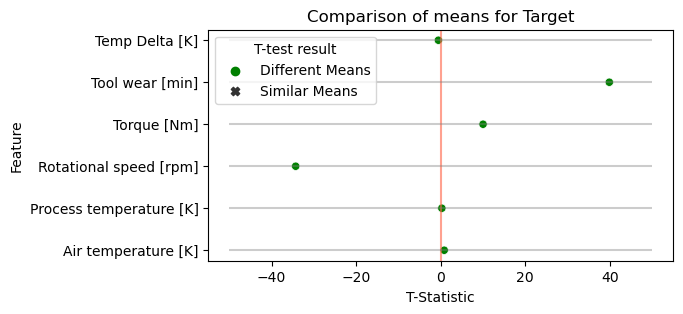

In [5]:
#T-test
e.t_test_cats(train, target_col)

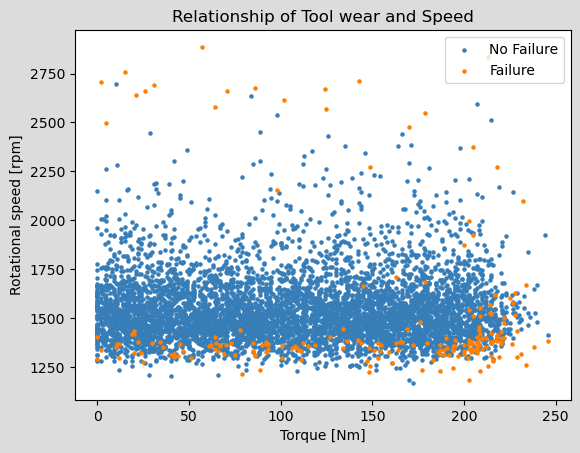

In [6]:
#Plot
e.explore_speed(train)

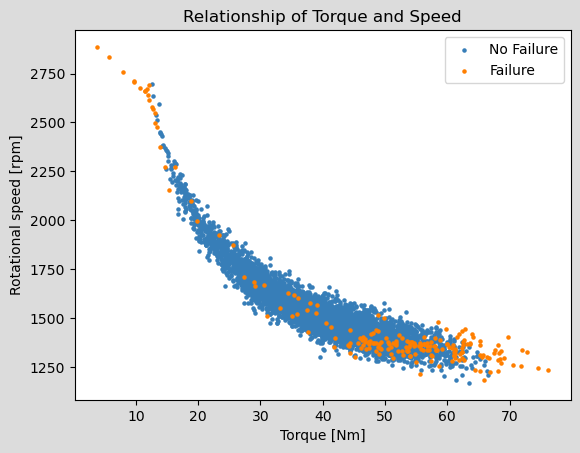

In [7]:
#Plot
e.explore_torque(train)

## Explore summary

The following features had different distribution means between the 'Failure' and 'Non-Failure' groups.
- Torque [Nm]
- Rotational speed [rpm]
- Tool wear [min]

## Modeling

In [8]:
#Seperates target column
X_train, y_train, X_val, y_val, X_test, y_test = m.prep_maint_data(df, target_col=target_col)

Measurement: 
- Recall

Basis: 
- False negative case would miss equipment failure, possibly causing injury or damage to adjacent machinery.

### Baseline

Recall is:

$TP  /  (TP + FN)$

In [9]:
#Finds baseline
baseline = m.find_baseline(X_train, y_train, print_baseline = True)

Baseline score: 0.5419


                 Model  Recall on Train  Recall on Validate  Difference
0        Decision Tree           0.6700              0.6176        0.05
1        Random Forest           0.9458              0.9706       -0.02
2                  KNN           0.3350              0.3088        0.03
3  Logistic Regression           0.9704              0.9853       -0.01


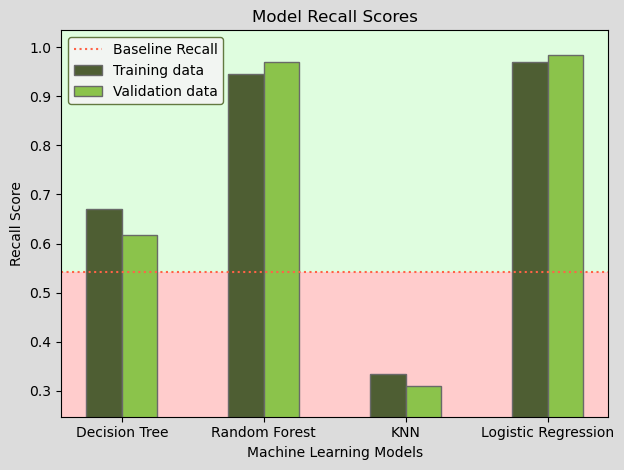

In [10]:
#Shows the scores for each model
m.find_model_scores(X_train, y_train, X_val, y_val, metric = 3, print_scores = True)

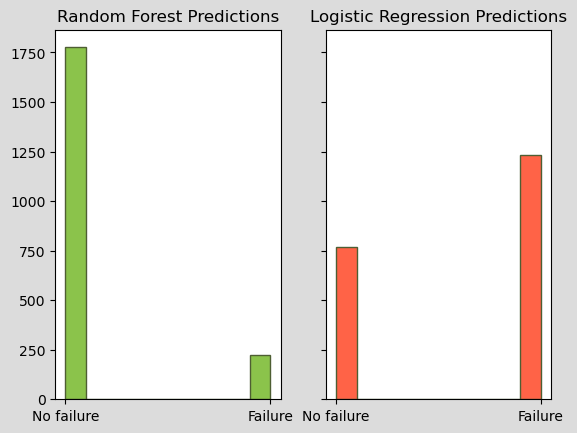

In [11]:
#Shows an issue
m.show_preds(X_train, y_train, X_val)

### Final Test

           Model  Recall on Train  Recall on Validate  Recall on Test
0  Random Forest           0.9458              0.9706          0.8971


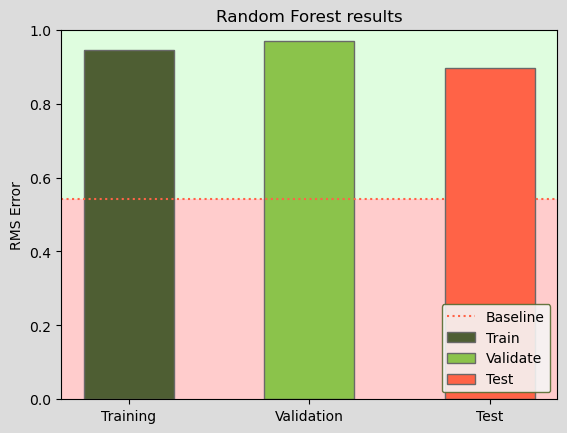

<Figure size 600x600 with 0 Axes>

In [12]:
#Runs the final test
m.final_test(X_train, y_train, X_val, y_val, X_test, y_test)

### Modeling Summary

- Baseline normally would be 0.
- Logistic Regression and Random Forest performed the best using Recall
- Looking at the classification report, Logistic Regression is predicting failure most of the time.
- Random Forest is doing a much better job overall.

## Conclusion

The best performing model was the Random Forest classifier
- Training set accuracy: 0.9458
- Validation set accuracy: 0.9706
- Test set accuracy: 0.8971

### Summery

Failures occurs at 3.4% in the dataset. The indicators of failure are: 
- Torque [Nm]
- Rotational speed [rpm]
- Tool wear [min]

### Recommendations

- Establish inspection methods to quickly identify false positive cases and restart equipment.
- The Random Forest Model is the best for identifying failure cases and has the least amount of impact on operations.

### Next Steps

- Explore upsampling to improve model performance (reduce false positive cases).
- Explore clustering failure groups.
- Attempt to identify failure types.
- Establish a better baseline metric.
- Explore the imbalanced-learn library for better solutions.